# Dois tanques

![Tanques](./tanques.png)

**Equacionamento**:

$\frac{d h_2}{dt} = -\frac{{c_v}_2}{A_2}\cdot\sqrt{h_2}+\frac{p_2}{A_2}\cdot T_2$

$ \frac{d h_1}{dt} = -\frac{{c_v}_1}{A_1}\cdot\sqrt{h_1}+\frac{{c_v}_2}{A_1}\cdot\sqrt{h_2}+\frac{p_1}{A_1}\cdot T_1$


**Parâmetros**:

- Tanque 1

  - $T_1$ -> sinal encaminhado para bomba 1 (mA)
  
  - ${c_v}_1$ -> constante de descarga do tanque 1 = 27 cm$^{2.5}$/s

  - ${p_1}$ -> parâmetro para conversão entre sinal da bomba 1 e vazão = 20,25 cm$^3$ s$^{-1}$ / mA

  - ${A_1}$  -> Área da seção transversao ao tanque 1  = 225 cm$^2$

- Tanque 2

  - $T_2$ -> sinal encaminhado para bomba 2 (mA)
  
  - ${c_v}_2$ -> constante de descarga do tanque 2  = 24,75 cm$^{2.5}$/s

  - ${p_2}$ -> parâmetro para conversão entre sinal da bomba 2 e vazão = 6,75 cm$^3$ s$^{-1}$ / mA

  - ${A_2}$  -> Área da seção transversao ao tanque 2 = 225 cm$^2$



In [1]:
# Importação de pacotes
import serial

from numpy import linspace, array, hstack

## Pacotes que permitem manipular como os gráficos aparecem neste notebook
from matplotlib.pyplot import figure
from IPython import display
from ipywidgets.widgets.interaction import show_inline_matplotlib_plots

In [2]:
# Gráfico

def grafico(h1,h2,v1,v2,instanteTempo):
    
    fig = figure(figsize=(4,8))
    
    ax = fig.add_subplot(2, 1, 1)
    ax.plot([0, 0], [0, 20], 'k-', [1, 1], [0, 20], 'k-')
    ax.plot([0, 1],[float(h2), float(h2)],'b-')
    ax.set_ylabel('h2')
    ax.set_ylim(0,20)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(True)
    
    ax = fig.add_subplot(2, 1, 2)
    ax.plot([0, 0], [0, 20], 'k-',[1, 1], [0, 20], 'k-')
    ax.plot([0, 1], [float(h1), float(h1)], 'b-')
    ax.set_ylabel('h1')
    ax.set_ylim(0,20)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(True) 
    
    ax.text(1.1, 2.2, 'Tempo: {:.2f} s'.format(instanteTempo), fontsize=14, verticalalignment='top',)
    ax.text(1.1, 0.95, 'v1: {:.2f} mA | v2: {:.2f} mA'.format(float(v1), float(v2)), fontsize=14, verticalalignment='top',)

    
def grafico_tendencia(h1,h2,v1,v2,namostra):
    
    tempo = linspace(0,(namostra-1)*Ts,namostra)

    fig = figure(figsize=(10,5))
    axes = fig.add_subplot(4,1,1)
    axes.plot(tempo,h2,'.-')
    axes.set_ylabel('$h_2$/ cm')
    axes.get_xaxis().set_visible(False)

    axes = fig.add_subplot(4,1,2)
    axes.plot(tempo,h1,'.-')
    axes.set_ylabel('$h_1$ / cm')
    axes.get_xaxis().set_visible(False)

    axes = fig.add_subplot(4,1,3)
    axes.plot(tempo,v2,'.-')
    axes.set_ylabel('$T_2$ / mA')
    axes.get_xaxis().set_visible(False)

    axes = fig.add_subplot(4,1,4)
    axes.plot(tempo,v1,'.-')
    axes.set_ylabel('$T_1$ / mA')
    axes.set_xlabel('tempo / s')
    display.clear_output(wait=True)

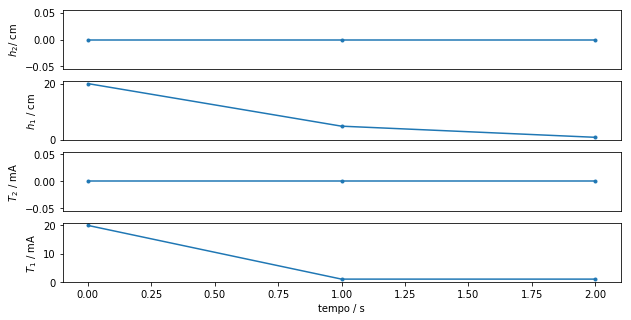

KeyboardInterrupt: 

In [10]:
ser = serial.Serial('/dev/ttyUSB0', 9600)  # Establish the connection on a specific port

nsim = 100 # Quantidade total de amostras

Ts = 1. # Período de amostragem

# Condições iniciais

h20 = 20.
h10 = 10.

# Variáveis exógenas
v1 = [0.0]*50
[v1.append(1.) for it in range(50)]
[v1.append(0.) for it in range(20)]

v2 = [50.0]*100
[v2.append(0.) for it in range(20)]
[v2.append(0.) for it in range(20)]


# Iniciando listas
h1 = []
h2 = []
v1_ = []
v2_ = []

# Comunicação
# x = ser.readline()
# print(x)

#Escrevendo condicoes inicias
ser.write(bytearray('{:.2f};{:.2f}'.format(h10,h20),'ASCII'))

# Simulando...
for it in range(nsim):
    
    ser.write(bytearray('{:.2f};{:.2f};{:.2f};{:.2f}\n'.format(1,v1[it],v2[it],Ts),'ASCII'))
    
    x = ser.readline().decode("utf-8")
    
    data = x.split('&')

    h1.append(float(data[0]))
    h2.append(float(data[1]))
    v1_.append(float(data[2]))
    v2_.append(float(data[3]))

    # mostrando a figura
    #grafico(*data,it*Ts)
    grafico_tendencia(h1,h2,v1_,v2_,it+1)
    display.clear_output(wait=True)
    show_inline_matplotlib_plots()
        
    
ser.close() # Fechando a conexão com o arduino através da porta serial

In [11]:
ser.close()